### 於sales.csv 新增油價欄位資訊。若有缺失的油價資訊，請填入缺失值。埴入方式請解釋並說明原因。 

In [1]:
import pandas as pd

# Read the oil price data
oil_df = pd.read_csv('oil.csv')

# Display the first few rows to understand its structure
print(oil_df.head())

         date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20


處理oil.csv 中油價的缺失值，方法為缺失值前後一日的油價計算平均後填入
使用這個方法是因為，雖然大多數油價相差不大(在1元以內)，但是有時會相差達5(如2014/9/1)
因此比起簡單的前後填充，使用平均更加合理

最後執行一次backfill，處理第一個缺失值

In [2]:
#conver the date and oilprice to np data formate 
oil_df['date'] = pd.to_datetime(oil_df['date'], errors='coerce')  # Convert to datetime, invalid parsing will be set as NaT
oil_df['dcoilwtico'] = pd.to_numeric(oil_df['dcoilwtico'], errors='coerce')  # Convert to numeric, invalid parsing will be set as NaN

# Handle missing values
#use the bake value to fillup the mising value

def fillup_with_mean(series):
    filled_series = series.copy()
    forward_fill = filled_series.ffill()
    backwad_fill = filled_series.bfill()

    mean_fill = (forward_fill+backwad_fill)/2
    return series.fillna(mean_fill)


oil_df['dcoilwtico'] = fillup_with_mean(oil_df['dcoilwtico'])
oil_df['dcoilwtico'] = oil_df['dcoilwtico'].bfill()

print(oil_df.head(437))


          date  dcoilwtico
0   2013-01-01       93.14
1   2013-01-02       93.14
2   2013-01-03       92.97
3   2013-01-04       93.12
4   2013-01-07       93.20
..         ...         ...
432 2014-08-28       96.44
433 2014-08-29       97.86
434 2014-09-01       95.39
435 2014-09-02       92.92
436 2014-09-03       95.50

[437 rows x 2 columns]


 read the sales data and add the oil price column
 將兩者merge，以sales.csv的date欄位作為依據
 合併後發現仍然有缺失值，是由於周休二日沒有開市的緣故，所以以forward fill來填補sales.csv中油價的缺失值

In [3]:
sales_df = pd.read_csv('sales.csv')

#print(sales_df.head())

#ensure the date columns in both dataframs are in the datetime format for merging
sales_df['date'] = pd.to_datetime(sales_df['date'],errors = 'coerce')
print(sales_df.head())
merged_df = pd.merge(sales_df,oil_df[['date','dcoilwtico']],on = 'date',how = 'left')
print(merged_df.head())
merged_df['dcoilwtico'] = merged_df['dcoilwtico'].ffill()



   id       date  store_nbr      family  sales  onpromotion
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0
1   1 2013-01-01          1   BABY CARE    0.0            0
2   2 2013-01-01          1      BEAUTY    0.0            0
3   3 2013-01-01          1   BEVERAGES    0.0            0
4   4 2013-01-01          1       BOOKS    0.0            0
   id       date  store_nbr      family  sales  onpromotion  dcoilwtico
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0       93.14
1   1 2013-01-01          1   BABY CARE    0.0            0       93.14
2   2 2013-01-01          1      BEAUTY    0.0            0       93.14
3   3 2013-01-01          1   BEVERAGES    0.0            0       93.14
4   4 2013-01-01          1       BOOKS    0.0            0       93.14


Save the Updated Sales Data

In [4]:
merged_df.to_csv('sales.csv',index = False)

### 繪製油價隨著時間的走勢圖

Text(0.5, 1.0, 'oil price over time')

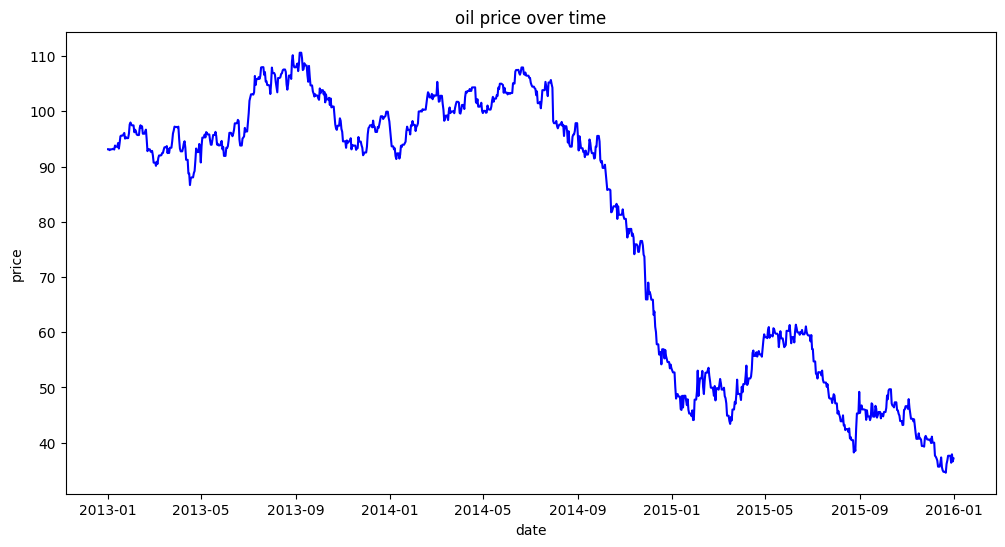

In [5]:
import matplotlib.pyplot  as plt

#read file
sales_df = pd.read_csv('sales.csv')
sales_df['date'] = pd.to_datetime(sales_df['date'])

#ploting
plt.figure(figsize = (12,6))
plt.plot(sales_df['date'],sales_df['dcoilwtico'],label = 'oil price',color = 'blue')
plt.xlabel('date')
plt.ylabel('price')
plt.title('oil price over time')


### 於sales.csv 新增欄位將store詳細資訊加入

In [6]:
sales_df = pd.read_csv('sales.csv')
store_df = pd.read_csv('stores.csv')


#ensure the store nbr columns in both dataframs are in the numeric format for merging
sales_df['store_nbr'] = pd.to_numeric(sales_df['store_nbr'],errors = 'coerce')
store_df['store_nbr'] = pd.to_numeric(store_df['store_nbr'],errors = 'coerce')

#merge the store information
merged_df = pd.merge(sales_df,store_df,on = 'store_nbr',how = 'left')
merged_df.to_csv('sales.csv',index = False)

### 將sales.csv 的日期(date)欄位拆分為month、dayofmonth、dayofweek，分別代表月份、該月分的那一天，及每一週的第幾天。 
### dayofweek 從0到6，從星期一到日

In [7]:
sales_df = pd.read_csv('sales.csv')

sales_df['date'] = pd.to_datetime(sales_df['date'],errors = 'coerce')

sales_df['month'] = sales_df['date'].dt.month
sales_df['dayofmonth'] = sales_df['date'].dt.day
sales_df['dayofweek'] = sales_df['date'].dt.day_of_week
 
# Move the new columns to the position after 'date'
cols =sales_df.columns.tolist()
cols.insert(2, cols.pop(cols.index('month')))
cols.insert(3, cols.pop(cols.index('dayofmonth')))
cols.insert(4, cols.pop(cols.index('dayofweek')))
sales_df = sales_df[cols]

sales_df.to_csv('sales.csv',index = False)

### 於sales.csv 新增欄位holiday，代表當日是否為holiday。

In [9]:
sales_df = pd.read_csv('sales.csv')
holiday_df = pd.read_csv('holidays_events.csv')

sales_df['date'] = pd.to_datetime(sales_df['date'],errors= 'coerce')
holiday_df['date'] = pd.to_datetime(holiday_df['date'],errors = 'coerce')
#filters the holidays_df DataFrame to only include rows where the 'type' column is equal to 'Holiday'.
holiday_df = holiday_df[holiday_df['type'] == 'Holiday']
#print(holiday_df[['date','type','locale_name']])
#print(sales_df[['date','city']])

#because holidays_df dont have column 'city',so change the corresponding column 'locale_name' to 'city'
holiday_df.rename(columns={'locale_name' :'city'},inplace = True)
holiday_df.rename(columns={'type' :'Holiday'},inplace = True)


merged_df = pd.merge(sales_df,holiday_df[['date','city','Holiday']],on = ['date','city'],how = 'left')

merged_df.to_csv('sales.csv',index = False)

C:\Users\j9902\AppData\Local\Temp\ipykernel_13896\375067936.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_df = pd.read_csv('sales.csv')


### 請繪製2013、2014、2015銷售量最高的五種產品於同一張圖表。

C:\Users\j9902\AppData\Local\Temp\ipykernel_13896\3360560478.py:1: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_df = pd.read_csv('sales.csv')


family
GROCERY I    2.002353e+08
BEVERAGES    1.112542e+08
CLEANING     5.939355e+07
PRODUCE      4.918118e+07
DAIRY        3.606482e+07
Name: sales, dtype: float64


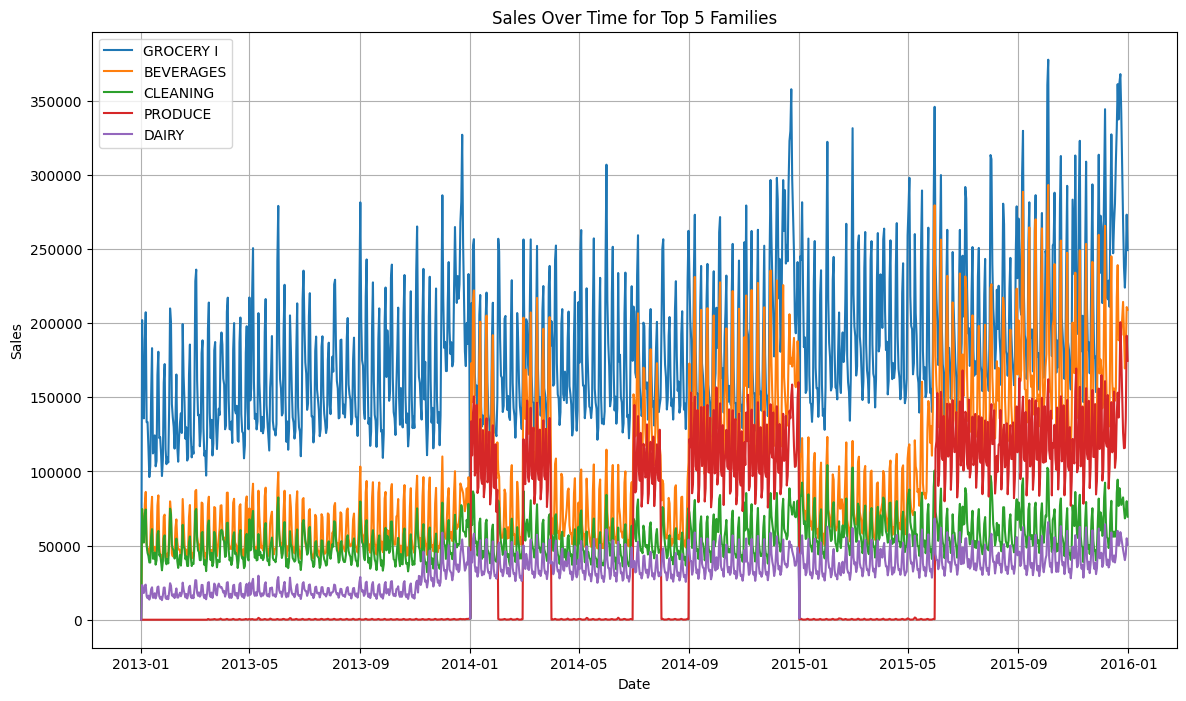

In [33]:
sales_df = pd.read_csv('sales.csv')

sales_df['date'] = pd.to_datetime(sales_df['date'],errors= 'coerce')
#sales_df.head()

#先依照類別，把相同類別的聚在一類，然後再把此類別中的銷售數累加，以此知道3年來累積銷售前五名
grouped = sales_df.groupby(['family'])['sales'].sum()

sorted = grouped.sort_values(ascending = False)

top5 = sorted.head(5)

print(top5)
#上面目的只是為了得到前五


#把非top5 family的row從sales_df濾除
#use boolean indexing,returning only the row where the codition is True
#要特別注意，top5是pandas Series object,是one dimension的資料類別，由index(family名稱)以及sales Number組成
#top5 是銷售量
#top5.index才是family 的名稱
filtered_sales_df = sales_df[sales_df['family'].isin(top5.index)]


#先再用一次groupby,把同一日期的同一類別銷售量聚合在一起
grouped = filtered_sales_df.groupby(['date','family'])['sales'].sum()

grouped_df = grouped.reset_index()

plt.figure(figsize=(14, 8))
#依照不同的family，分別印出date對於銷量的圖形
for i in top5.index:
    subset = grouped_df[grouped_df['family'] == i]
    plt.plot(subset['date'],subset['sales'],label = i)


plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time for Top 5 Families')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\j9902\AppData\Local\Temp\ipykernel_17912\1468231614.py:5: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_df = pd.read_csv('sales.csv')


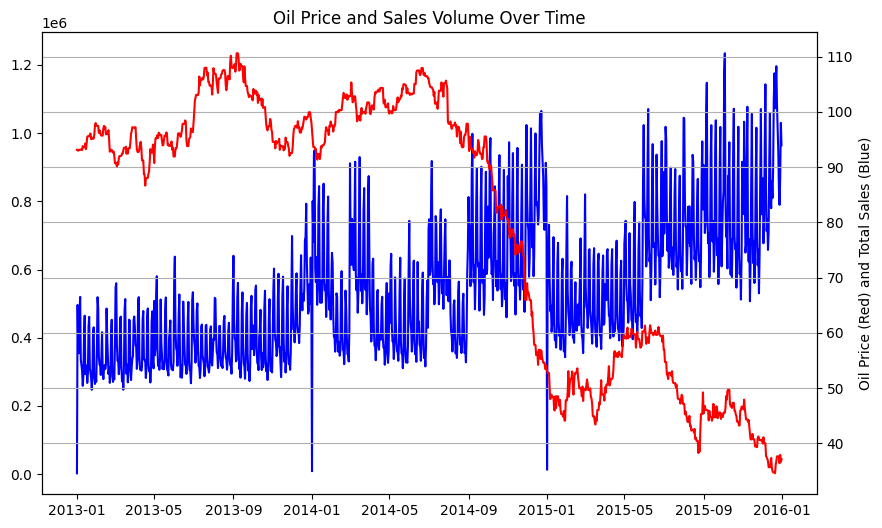

In [187]:
import pandas as pd
import matplotlib.pyplot as plt

sales_df = pd.read_csv('sales.csv')

# 將日期轉換為datetime格式
sales_df['date'] = pd.to_datetime(sales_df['date'], errors='coerce')


# 依照日期對銷售額進行分組並求和
daily_sales = sales_df.groupby('date')['sales'].sum()

# 重置索引，方便繪圖
daily_sales_df = daily_sales.reset_index()

# 併入油價數據（drop_duplicates確保每個日期只有一個油價）
daily_sales_df = daily_sales_df.merge(sales_df[['date', 'dcoilwtico']].drop_duplicates(), on='date', how='left')


plt.figure(figsize=(10, 6))

# 繪製銷售量的折線圖
plt.plot(daily_sales_df['date'], daily_sales_df['sales'], label='Total Sales', color='blue')

# 繪製油價的折線圖（使用次坐標軸以便顯示兩者不同的數據範圍）
plt.twinx()
plt.plot(daily_sales_df['date'], daily_sales_df['dcoilwtico'], label='Oil Price', color='red')

# 添加標籤和圖例
plt.title('Oil Price and Sales Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Oil Price (Red) and Total Sales (Blue)')
plt.grid(True)
plt.show()


